In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load data directly using pandas
jalapeno_df = pd.read_csv('benchmark/jalapeno_benchmark_results.csv')
radish_df = pd.read_csv('benchmark/radish_benchmark_results.csv')

# Add system column to each dataframe
jalapeno_df['System'] = 'jalapeno'
radish_df['System'] = 'radish'

# Combine the dataframes
df = pd.concat([jalapeno_df, radish_df], ignore_index=True)

# df.to_csv('combined_benchmark_results.csv', index=False)

Graph has been saved as 'jalapeno_bb_benchmark_comparison.png'
Graph has been saved as 'jalapeno_bb_benchmark_comparison-log.png'
Graph has been saved as 'jalapeno_ms_benchmark_comparison.png'
Graph has been saved as 'jalapeno_ms_benchmark_comparison-log.png'
Graph has been saved as 'jalapeno_qs_benchmark_comparison.png'
Graph has been saved as 'jalapeno_qs_benchmark_comparison-log.png'
Graph has been saved as 'radish_bb_benchmark_comparison.png'
Graph has been saved as 'radish_bb_benchmark_comparison-log.png'
Graph has been saved as 'radish_ms_benchmark_comparison.png'
Graph has been saved as 'radish_ms_benchmark_comparison-log.png'
Graph has been saved as 'radish_qs_benchmark_comparison.png'
Graph has been saved as 'radish_qs_benchmark_comparison-log.png'


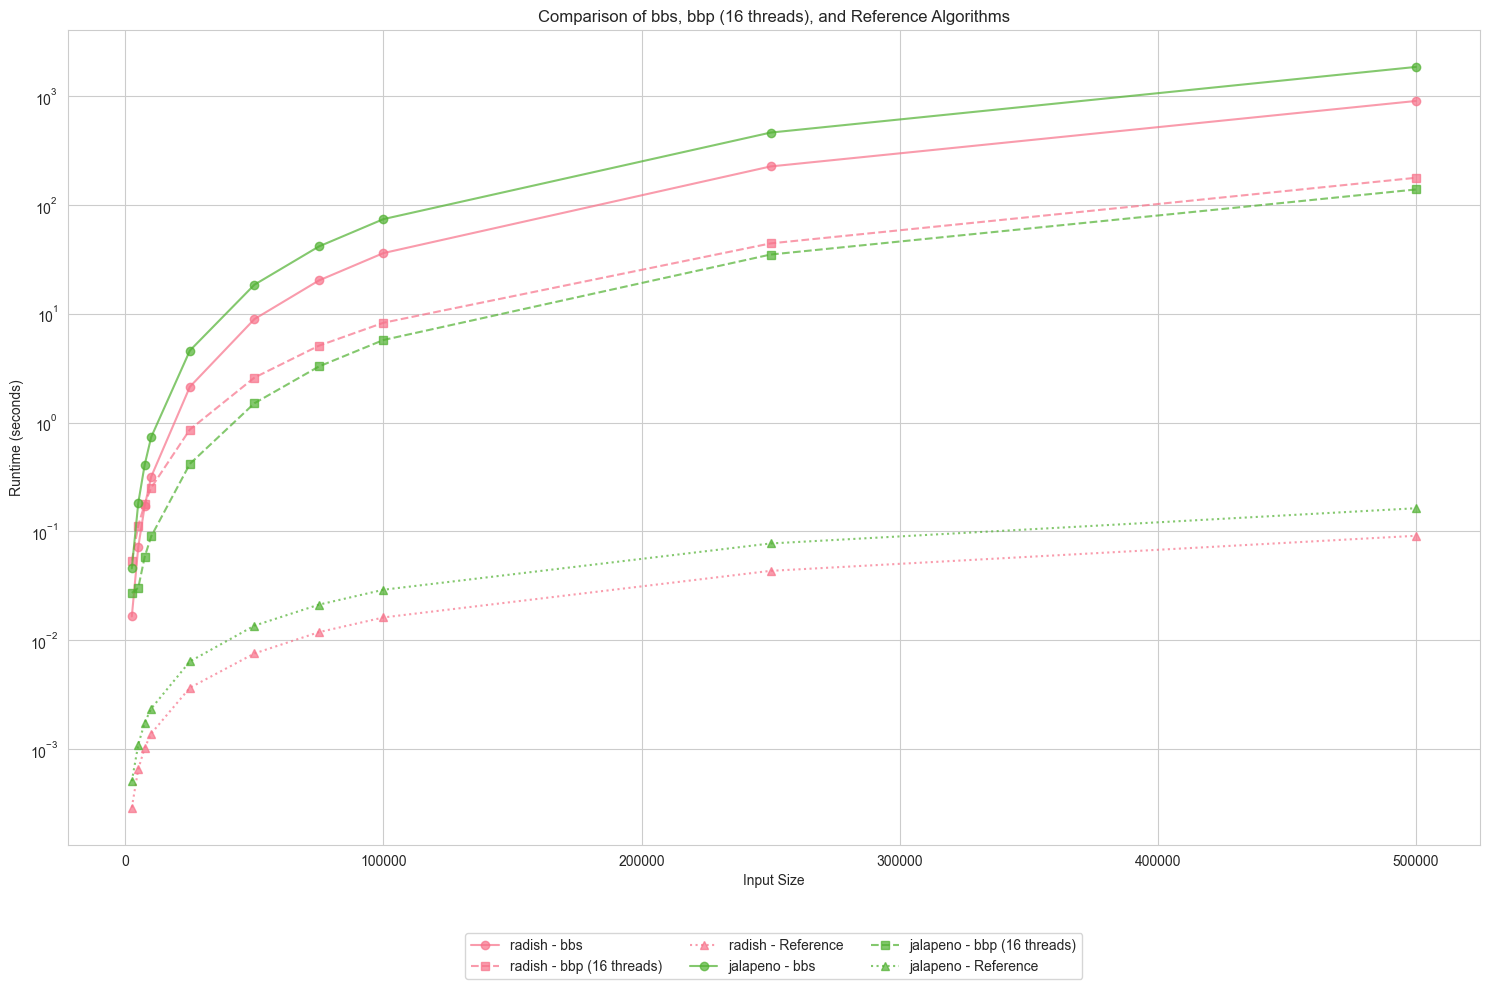

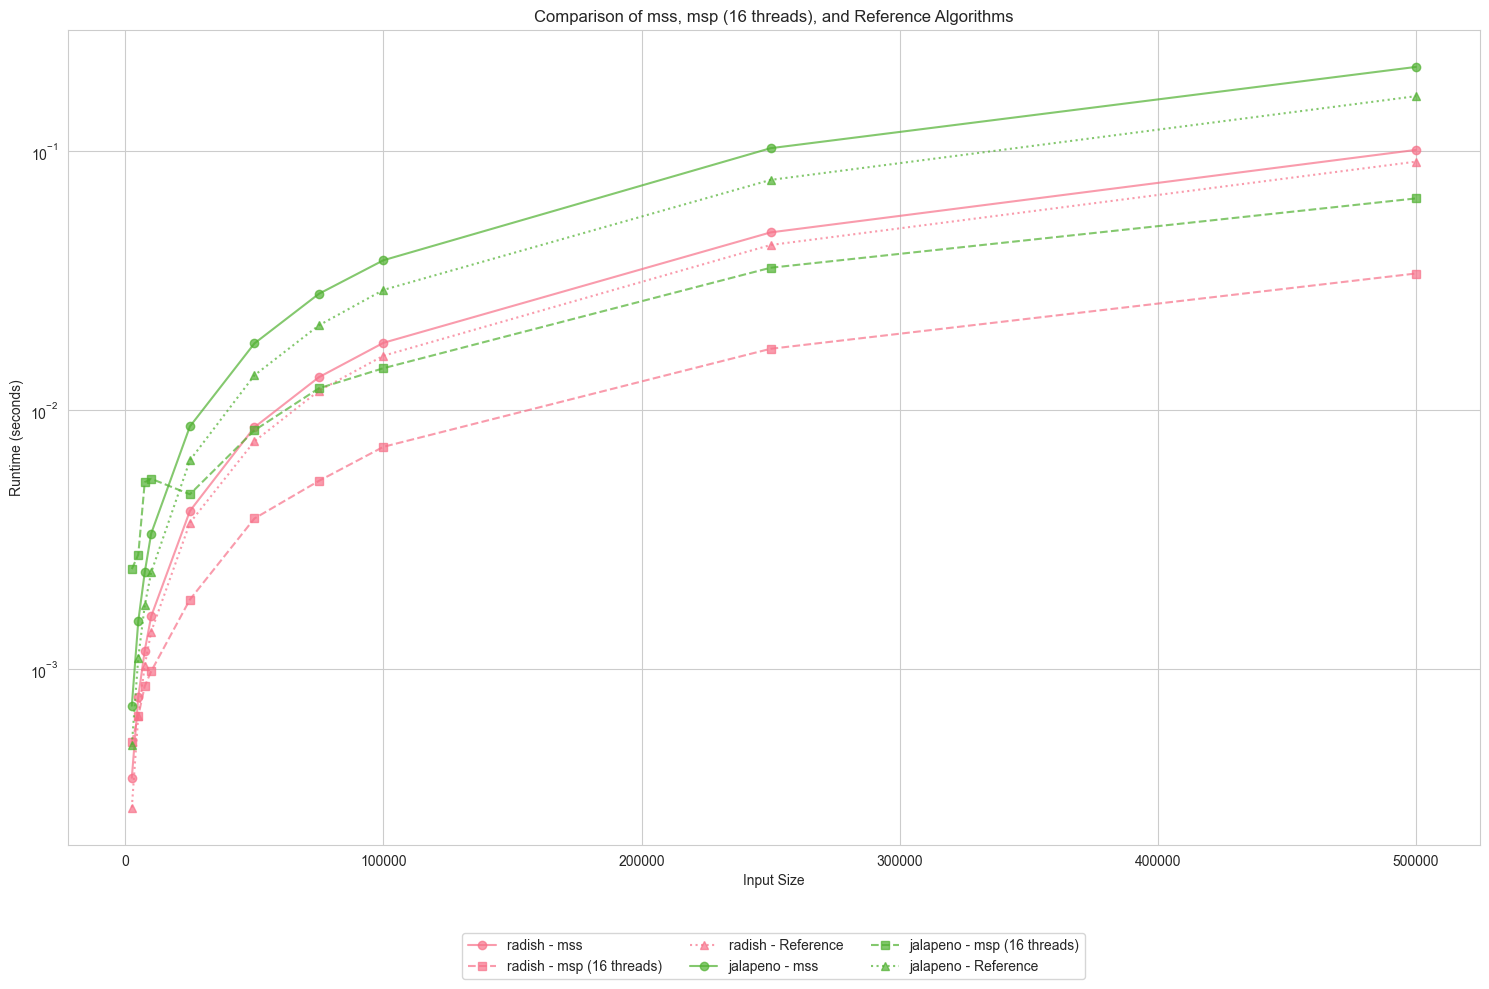

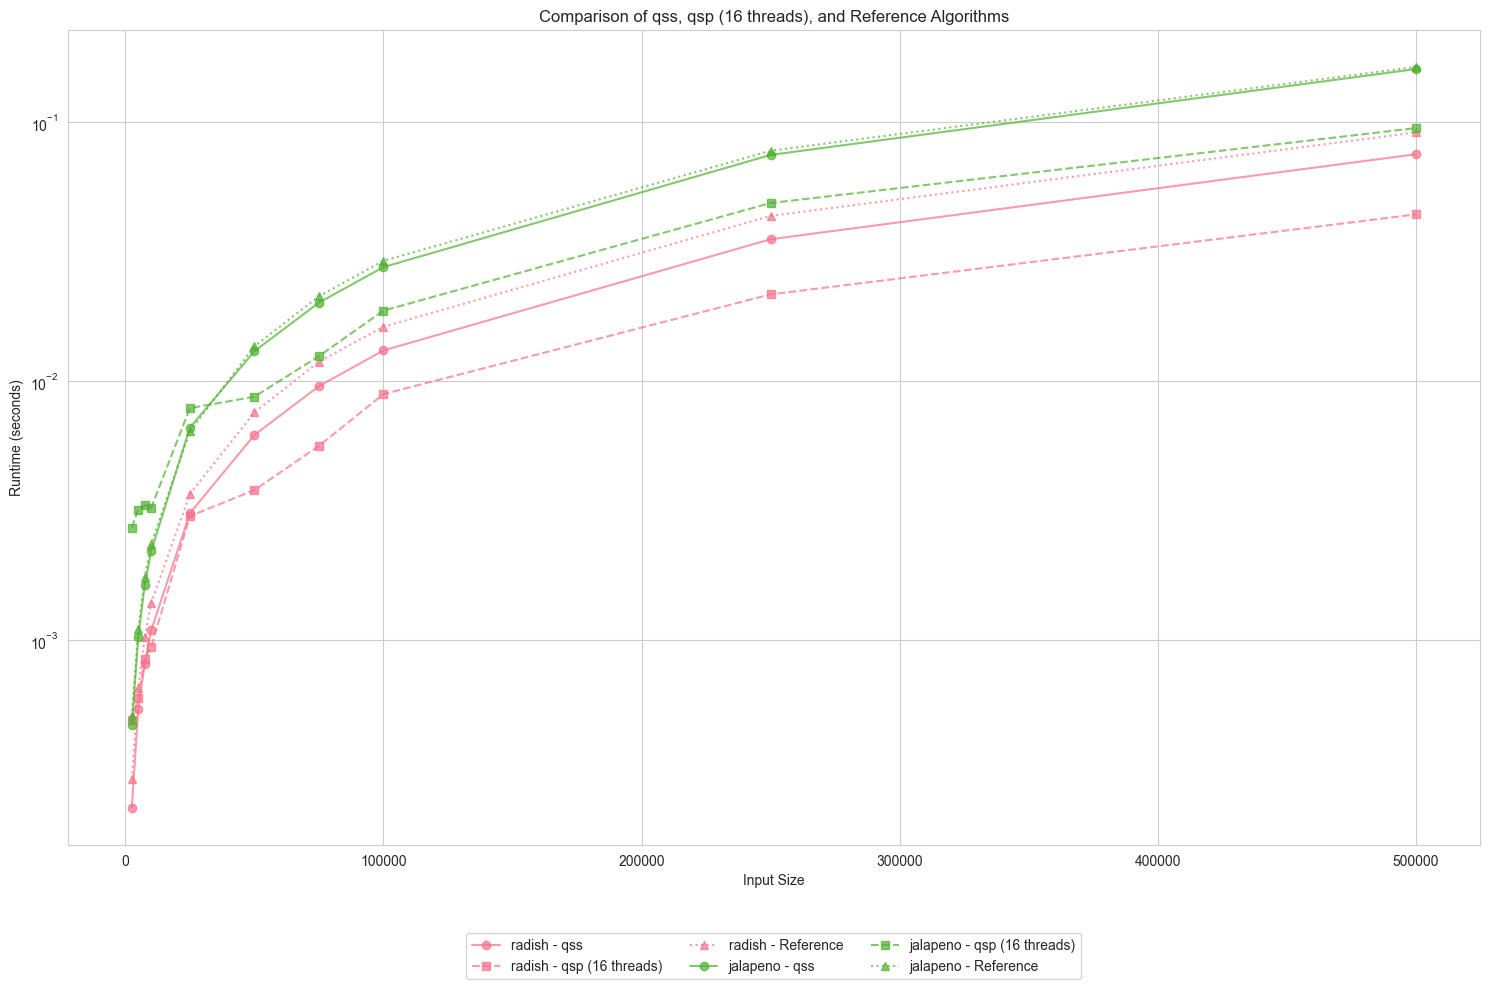

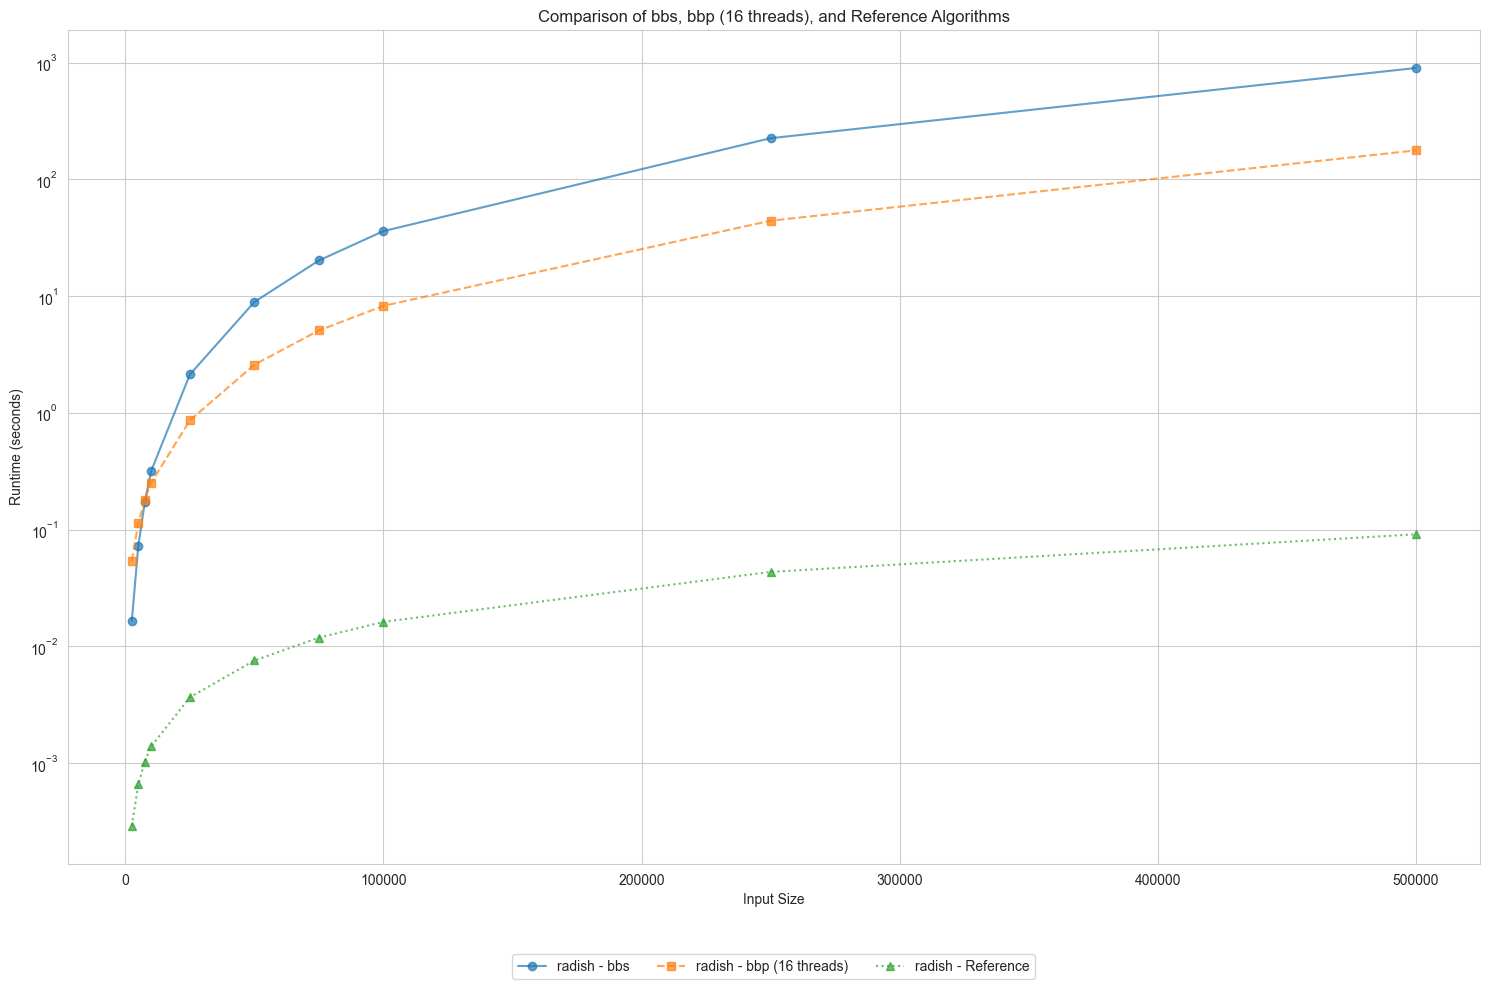

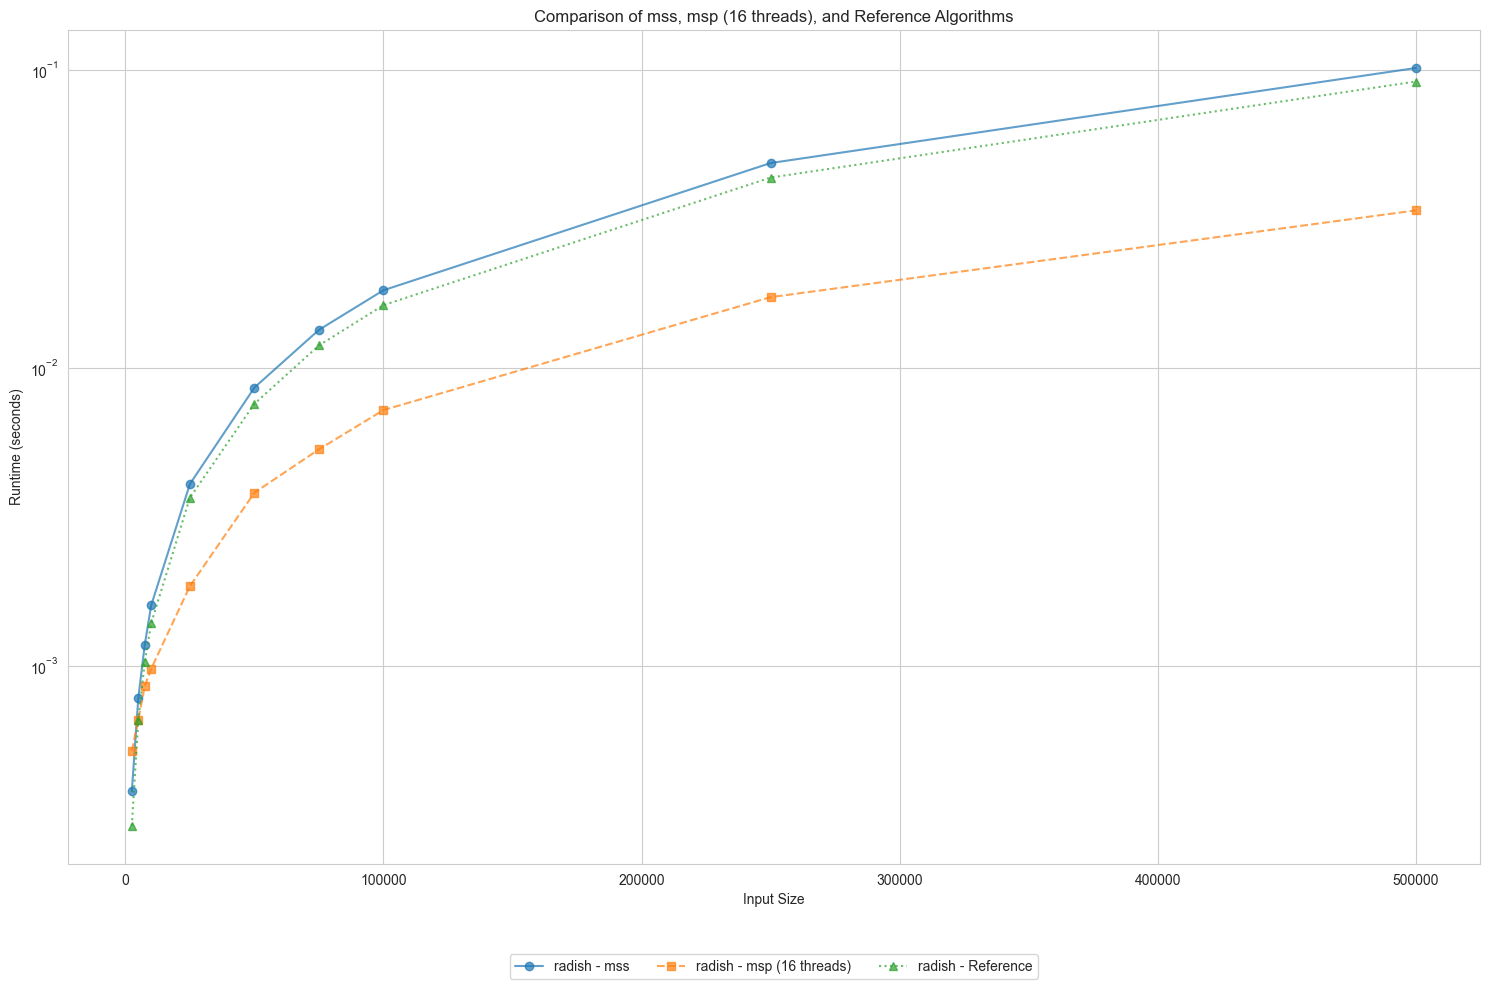

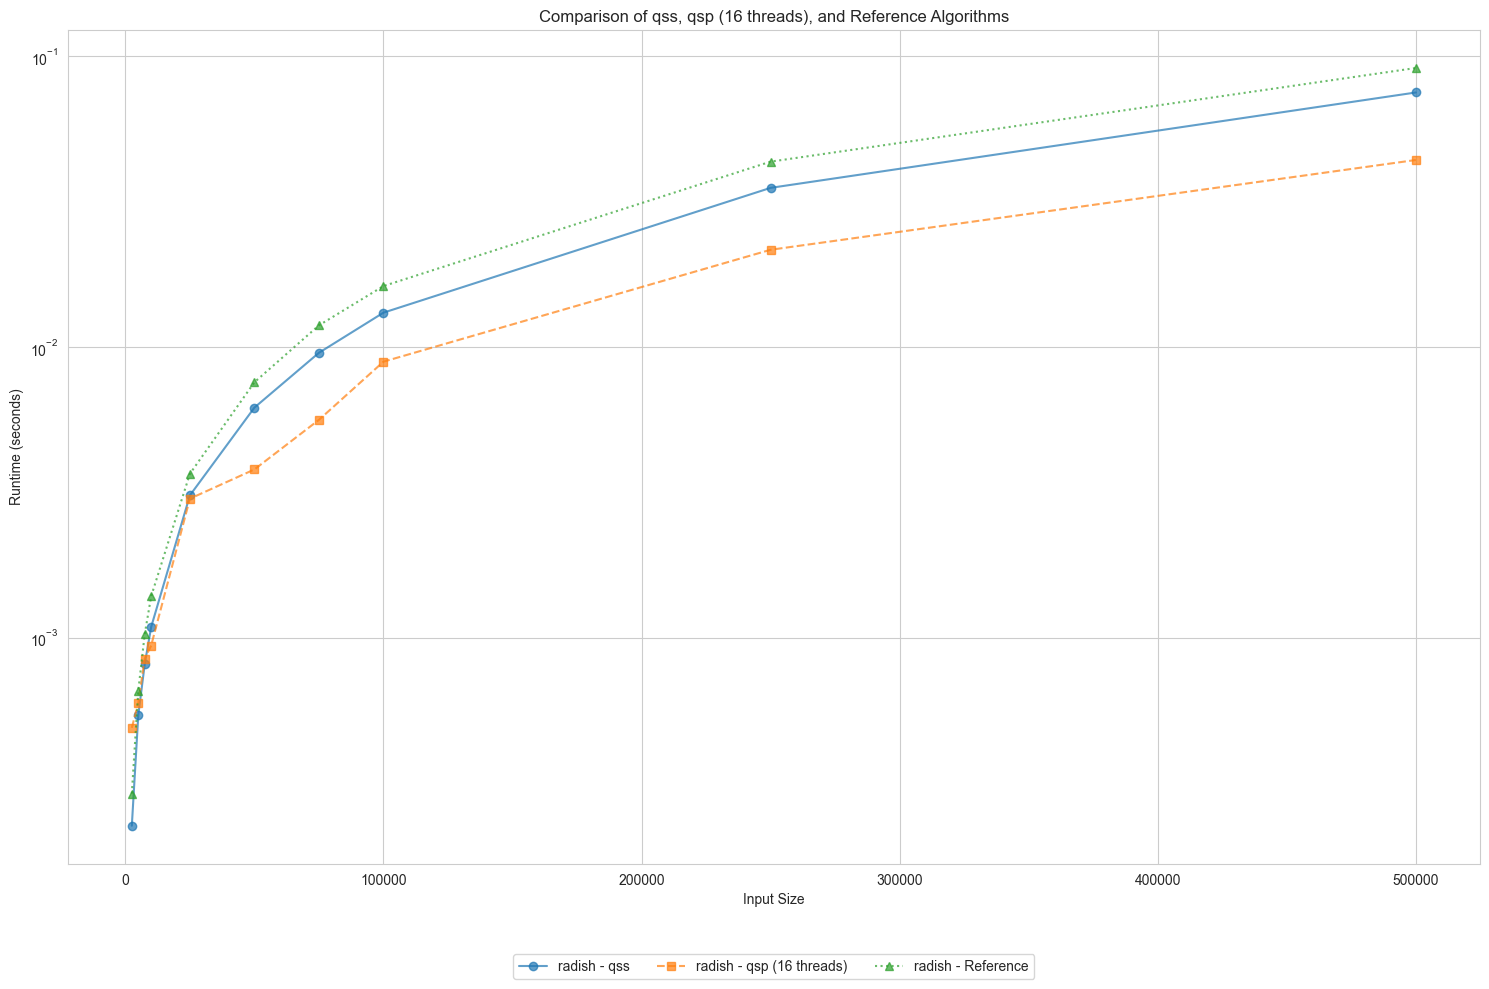

In [5]:
systems = ['radish', 'jalapeno']
algo = ['bb', 'ms', 'qs']
colors = sns.color_palette("husl", n_colors=3)

while (systems):
    for alg in algo:
        plt.figure(figsize=(15, 10))
        sns.set_style("whitegrid")
        for i, system in enumerate(systems):
            system_data = df[(df['System'] == system) & (df['Input Size'] <= 500000)]

            # Plot BBS (serial)
            serial_data = system_data[system_data['Algorithm'] == f"{alg}s"]

            plt.plot(serial_data['Input Size'], serial_data['Runtime'], 
                        marker='o', linestyle='-', label=f'{system} - {alg}s',
                        color= colors[i] if len(systems) != 1 else None, alpha=0.7)
            
            # Plot BBP with 16 threads
            parallel_data = system_data[(system_data['Algorithm'] == f"{alg}p") & 
                                    (system_data['Threads'] == 16)]
            if not parallel_data.empty:
                plt.plot(parallel_data['Input Size'], parallel_data['Runtime'], 
                            marker='s', linestyle='--', label=f'{system} - {alg}p (16 threads)',
                            color= colors[i] if len(systems) != 1 else None, alpha=0.7)
            
            # Plot Reference
            reference_data = system_data[system_data['Algorithm'] == 'reference']
            plt.plot(reference_data['Input Size'], reference_data['Runtime'], 
                        marker='^', linestyle=':', label=f'{system} - Reference',
                        color= colors[i] if len(systems) != 1 else None, alpha=0.7)

        plt.xlabel('Input Size')
        plt.ylabel('Runtime (seconds)')
        plt.title(f'Comparison of {alg}s, {alg}p (16 threads), and Reference Algorithms')
        plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=3)

        plt.tight_layout()
        plt.savefig(f'images/{alg}/{alg}{"-hyperthread" if len(systems) !=1 else ""}-lg.png')
        print(f"Graph has been saved as '{system}_{alg}_benchmark_comparison.png'")

        plt.yscale('log')
        plt.tight_layout()
        plt.savefig(f'images/{alg}/{alg}-log{"-hyperthread" if len(systems) !=1 else ""}-lg.png')
        print(f"Graph has been saved as '{system}_{alg}_benchmark_comparison-log.png'")
    systems.pop(-1)